In [1]:
import tensorflow as tf
import keras
import os

Using TensorFlow backend.


In [2]:
covid_dir = os.path.join('C:/Users/Rifat/Desktop/Covid-19/COVID IMAGE/two/train/covid')
normal_dir = os.path.join('C:/Users/Rifat/Desktop/Covid-19/COVID IMAGE/two/train/normal')


print('total training Covid images:', len(os.listdir(covid_dir)))
print('total training Normal images:', len(os.listdir(normal_dir)))

covid_files = os.listdir(covid_dir)
print(covid_files[:10])

normal_files = os.listdir(normal_dir)
print(normal_files[:10])

total training Covid images: 61
total training Normal images: 70
['covid1.jpeg', 'covid10.jpeg', 'covid11.jpeg', 'covid12.jpeg', 'covid13.jpeg', 'covid14.jpeg', 'covid15.jpeg', 'covid16.jpeg', 'covid17.jpeg', 'covid18.jpeg']
['normal1.jpeg', 'normal10.jpeg', 'normal11.jpeg', 'normal12.jpeg', 'normal13.jpeg', 'normal14.jpeg', 'normal15.jpeg', 'normal16.jpeg', 'normal17.jpeg', 'normal18.jpeg']


In [3]:
print(covid_files[59])

covid8.jpeg


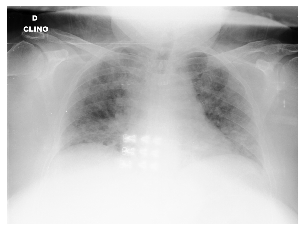

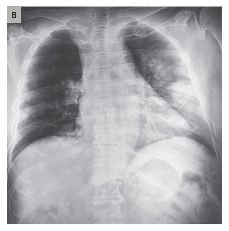

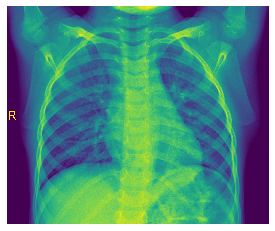

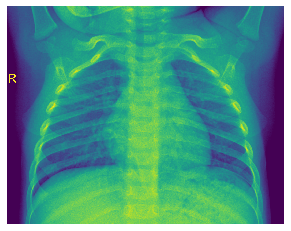

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_covid = [os.path.join(covid_dir, fname) 
                for fname in covid_files[pic_index-2:pic_index]]
next_normal = [os.path.join(normal_dir, fname) 
                for fname in normal_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_covid+next_normal):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = 'C:/Users/Rifat/Desktop/Covid-19/COVID IMAGE/two/train/'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
    )

VALIDATION_DIR = 'C:/Users/Rifat/Desktop/Covid-19/COVID IMAGE/two/test/'
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='binary'
)


Found 131 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


In [20]:
    DESIRED_ACCURACY = 0.999

    class myCallback(tf.keras.callbacks.Callback):
         # Your Code
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('accuracy')>0.7):
                print("\nReached 99.9% accuracy so cancelling training")
                self.model.stop_training = True

    callbacks = myCallback()
    
    # This Code Block should Define and Compile the Model. Please assume the images are 150 X 150 in your implementation.
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    from tensorflow.keras.optimizers import RMSprop

    model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                 metrics=['accuracy'])
    
    history = model.fit(
              train_generator,
#               steps_per_epoch=8,  
              epochs=25,
#               validation_data = validation_generator,
              verbose=1,
              callbacks=[callbacks])
    # model fitting
    print( history.history['accuracy'][-1])

Train for 5 steps
Epoch 1/25
5/5 [==============================] - 7s 1s/step - loss: 3.2633 - accuracy: 0.5802
Epoch 2/25
5/5 [==============================] - 6s 1s/step - loss: 0.6984 - accuracy: 0.5420
Epoch 3/25
5/5 [==============================] - 6s 1s/step - loss: 0.7599 - accuracy: 0.6412
Epoch 4/25
5/5 [==============================] - 5s 1s/step - loss: 0.5553 - accuracy: 0.6260
Epoch 5/25
4/5 [=======================>......] - ETA: 1s - loss: 1.1228 - accuracy: 0.7172
Reached 99.9% accuracy so cancelling training
5/5 [==============================] - 4s 876ms/step - loss: 0.9436 - accuracy: 0.7252
0.7251908


In [18]:
score = model.evaluate(validation_generator)

print(score)

1/1 [==============================] - 1s 810ms/step - loss: 0.3459 - accuracy: 0.8333
[0.3458751440048218, 0.8333333]


In [21]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 128)     

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")

Train for 5 steps, validate for 1 steps
Epoch 1/15
5/5 [==============================] - 8s 2s/step - loss: 3.5344 - accuracy: 0.5802 - val_loss: 0.6351 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 5s 1s/step - loss: 0.6150 - accuracy: 0.6947 - val_loss: 0.4950 - val_accuracy: 0.6111
Epoch 3/15
5/5 [==============================] - 6s 1s/step - loss: 0.6331 - accuracy: 0.7023 - val_loss: 0.3887 - val_accuracy: 1.0000
Epoch 4/15
5/5 [==============================] - 5s 1s/step - loss: 0.5249 - accuracy: 0.7710 - val_loss: 0.2917 - val_accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 6s 1s/step - loss: 0.4554 - accuracy: 0.7863 - val_loss: 0.5183 - val_accuracy: 0.5556
Epoch 6/15
5/5 [==============================] - 5s 1s/step - loss: 0.8359 - accuracy: 0.6641 - val_loss: 0.5150 - val_accuracy: 0.8889
Epoch 7/15
5/5 [==============================] - 5s 1s/step - loss: 0.5541 - accuracy: 0.7405 - val_loss: 0.4186 - val_accuracy: 0.7778
E